In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning and Preprocessing

In [2]:
img = cv2.imread('./test_images/harry01.jpeg')
img.shape

(630, 1200, 3)

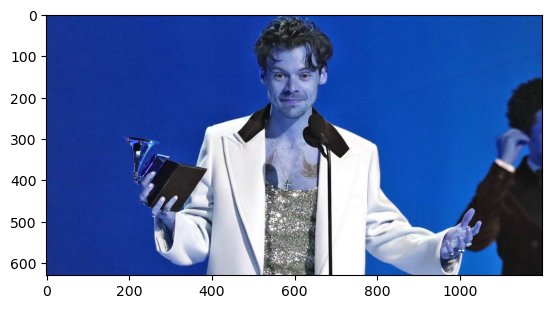

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(630, 1200)

In [5]:
gray

array([[ 73,  74,  77, ..., 100,  98,  98],
       [ 76,  76,  76, ...,  98,  98,  98],
       [ 78,  77,  75, ...,  97,  97,  98],
       ...,
       [ 74,  74,  74, ...,  21,  19,  19],
       [ 74,  74,  74, ...,  21,  19,  19],
       [ 73,  73,  73, ...,  21,  20,  19]], dtype=uint8)

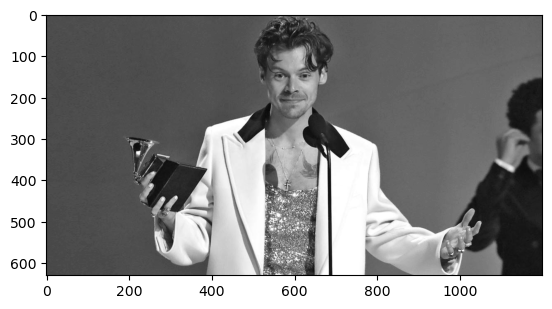

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[513,  84, 161, 161]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(513, 84, 161, 161)

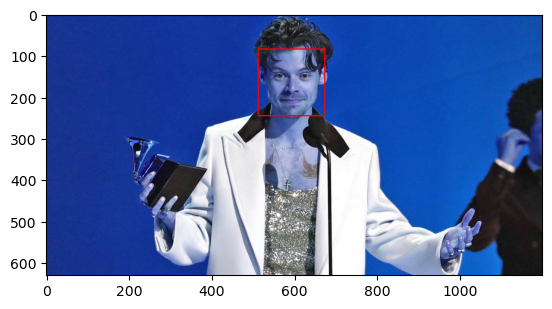

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

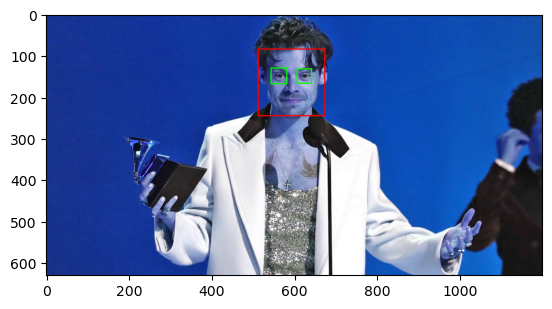

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

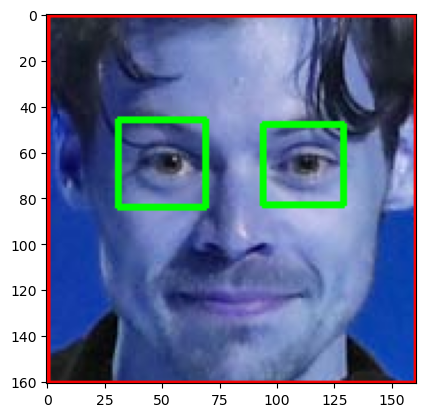

In [11]:
plt.imshow(roi_color, cmap='gray')

In [12]:
def cropped_two_eyes_images(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color


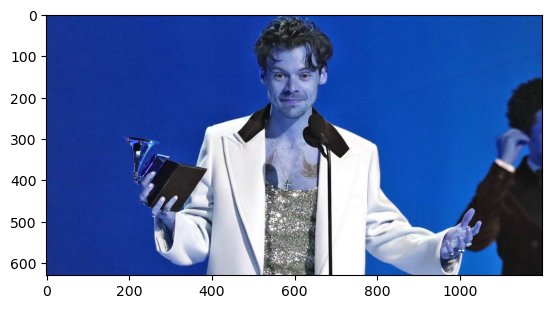

In [14]:
original_image = cv2.imread('./test_images/harry01.jpeg')
plt.imshow(original_image)

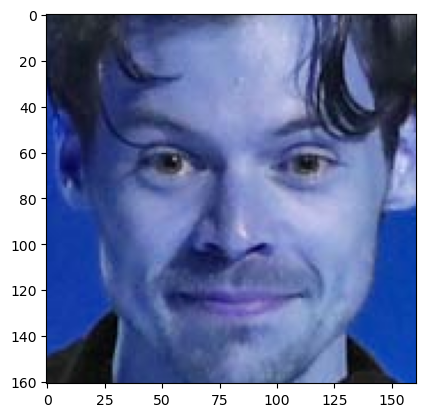

In [15]:
cropped_image = cropped_two_eyes_images('./test_images/harry01.jpeg')
plt.imshow(cropped_image)

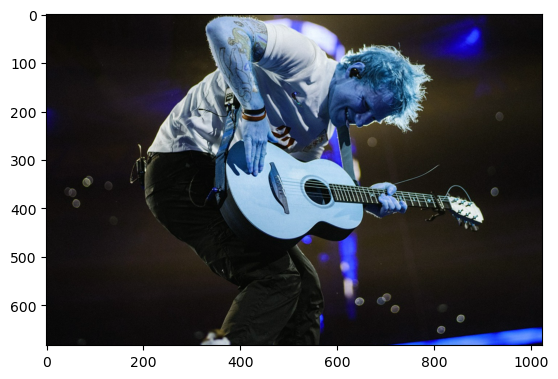

In [16]:
org_obstructed_image = cv2.imread('./test_images/ed.png')
plt.imshow(org_obstructed_image)

In [17]:
cropped_obstructed_image = cropped_two_eyes_images('./test_images/ed.png')
cropped_obstructed_image

In [18]:
path_to_data = "./dataset/"
path_to_cr_data ="./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/harry styles',
 './dataset/justin bieber',
 './dataset/taylor swift',
 './dataset/beyonce',
 './dataset/jungkook',
 './dataset/ed sheeran']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_img_dirs = []
celeb_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celeb_name = img_dir.split('/')[-1]
    print(celeb_name)
    
    celeb_file_names_dict[celeb_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = cropped_two_eyes_images(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celeb_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            
            cropped_file_name = celeb_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celeb_file_names_dict[celeb_name].append(cropped_file_path)
            count+=1

harry styles
Generating cropped images in folder:  ./dataset/cropped/harry styles
justin bieber
Generating cropped images in folder:  ./dataset/cropped/justin bieber
taylor swift
Generating cropped images in folder:  ./dataset/cropped/taylor swift
beyonce
Generating cropped images in folder:  ./dataset/cropped/beyonce
jungkook
Generating cropped images in folder:  ./dataset/cropped/jungkook
ed sheeran
Generating cropped images in folder:  ./dataset/cropped/ed sheeran


In [23]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

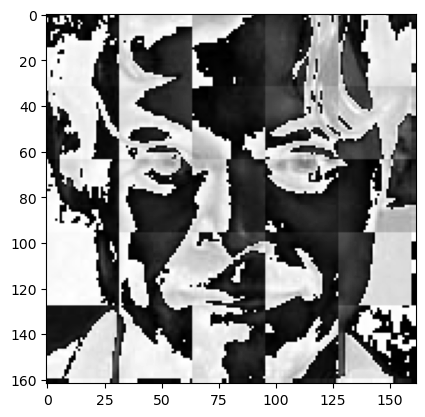

In [24]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [25]:
class_dict = {}
count = 0
for celeb_name in celeb_file_names_dict.keys():
    class_dict[celeb_name] = count
    count += 1
class_dict

{'harry styles': 0,
 'justin bieber': 1,
 'taylor swift': 2,
 'beyonce': 3,
 'jungkook': 4,
 'ed sheeran': 5}

In [26]:
X, Y = [], []

for celeb_name, training_files in celeb_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[celeb_name])

[ WARN:0@1409.419] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/harry styles/harry styles9.png'): can't open/read file: check file path/integrity
[ WARN:0@1409.539] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/harry styles/harry styles21.png'): can't open/read file: check file path/integrity
[ WARN:0@1409.546] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/harry styles/harry styles23.png'): can't open/read file: check file path/integrity
[ WARN:0@1409.799] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/harry styles/harry styles92.png'): can't open/read file: check file path/integrity
[ WARN:0@1409.875] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/harry styles/harry styles104.png'): can't open/read file: check file path/integrity
[ WARN:0@1409.904] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/harry styles/harry styles108.png'): can't open/read file: check file path/integrity
[ WARN:0@

[ WARN:0@1412.214] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/jungkook/jungkook26.png'): can't open/read file: check file path/integrity
[ WARN:0@1412.227] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/jungkook/jungkook32.png'): can't open/read file: check file path/integrity
[ WARN:0@1412.304] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/jungkook/jungkook45.png'): can't open/read file: check file path/integrity
[ WARN:0@1412.308] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/jungkook/jungkook47.png'): can't open/read file: check file path/integrity
[ WARN:0@1412.322] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/jungkook/jungkook53.png'): can't open/read file: check file path/integrity
[ WARN:0@1412.322] global loadsave.cpp:248 findDecoder imread_('./dataset/cropped/jungkook/jungkook54.png'): can't open/read file: check file path/integrity
[ WARN:0@1412.335] global loadsave.cpp:248 findDecoder imr

In [27]:
len(X)

678

In [28]:
32*32*3 + 32*32 #rgb + wavelet image size

4096

In [29]:
len(X[0])

4096

In [30]:
X = np.array(X).reshape(len(X),4096).astype(float) #to avoid sklearn warning as it is in int
X.shape

(678, 4096)

In [31]:
X[0] #represents color/shades of images

array([ 14.,  17.,  32., ..., 164.,  91., 167.])

## Training the Model

1. SVM with heuristic funetuning

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0)
# scaling our data
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf', C = 10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test,Y_test)

0.8705882352941177

In [34]:
len(X_test)

170

In [35]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        38
           1       0.79      0.76      0.78        25
           2       0.80      0.76      0.78        21
           3       0.90      0.90      0.90        42
           4       0.91      1.00      0.95        20
           5       1.00      0.79      0.88        24

    accuracy                           0.87       170
   macro avg       0.87      0.86      0.86       170
weighted avg       0.87      0.87      0.87       170



## Grid Search

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.84836,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.63576,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.84834,{'logisticregression__C': 1}


In [40]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [41]:
best_estimators['svm'].score(X_test, Y_test)

0.9058823529411765

In [42]:
best_estimators['random_forest'].score(X_test, Y_test)

0.7176470588235294

In [43]:
best_estimators['logistic_regression'].score(X_test, Y_test)

0.8588235294117647

In [44]:
best_clf = best_estimators['svm']

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, best_clf.predict(X_test))
cm

array([[35,  3,  0,  0,  0,  0],
       [ 0, 22,  2,  1,  0,  0],
       [ 1,  0, 19,  1,  0,  0],
       [ 1,  6,  0, 35,  0,  0],
       [ 0,  0,  0,  0, 20,  0],
       [ 0,  1,  0,  0,  0, 23]])

Text(95.72222222222221, 0.5, 'Actual')

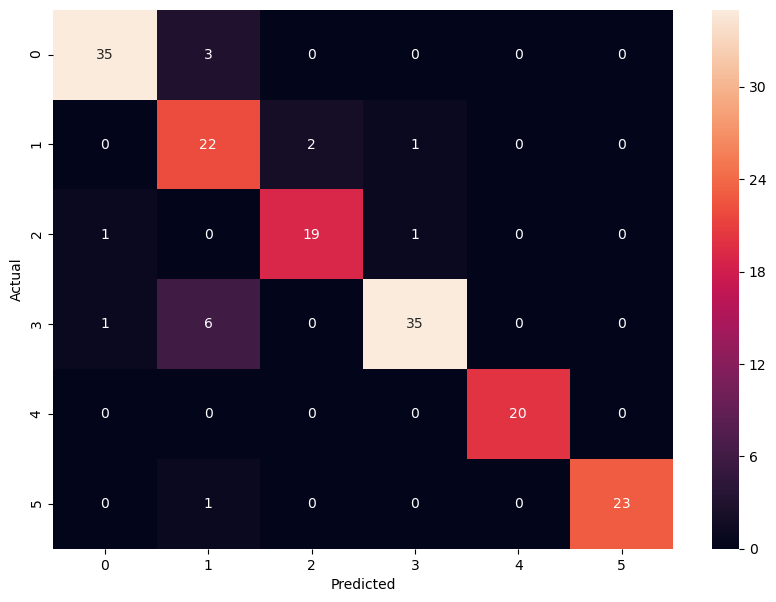

In [46]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [47]:
class_dict

{'harry styles': 0,
 'justin bieber': 1,
 'taylor swift': 2,
 'beyonce': 3,
 'jungkook': 4,
 'ed sheeran': 5}

## Saving the model and class dict

In [58]:
!pip install joblib

In [59]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [61]:
import json
with open("class_dict.json","w") as f:
    f.write(json.dumps(class_dict))